# Import XML

In [353]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [366]:
import pyhf
import pyhf.readxml
reload(pyhf.readxml)

spec = pyhf.readxml.parse('../../validation/xmlimport_input/config/example.xml', '../../validation/xmlimport_input/')
pdf = pyhf.Model(spec['channels'])
pdf

In [367]:
data = [binvalue for k in pdf.config.channel_order for binvalue in spec['data'][k]] + pdf.auxdata
data

[122.0, 112.0, 0, 0, 0]

In [368]:
print(pdf.config.suggested_init())
pdf.expected_actualdata(pdf.config.suggested_init())

[0.0, 1.0, 0.0, 0.0]


[120.0, 110.0]

In [376]:
def assemble(pdf, **kwargs):
    pars = pdf.config.suggested_init()
    for k, v in kwargs.items():
        pars[pdf.config.par_slice(k)] = v
    return pars

def disassemble(pdf, pars):
    return {
        k: pars[pdf.config.par_slice(k)] for k in pdf.config.par_map
    }

print pdf.expected_data(assemble(pdf, SigXsecOverSM = [1.0], syst1 = [0.0], syst2 = [0.0], syst3 = [0.0]))

pars = assemble(pdf, SigXsecOverSM = [2.0], syst2 = [0.0], syst3 = [0.0])
disassemble(pdf,pars)


spec['channels']['channel1']['signal']['data']

[120. 110.   0.   0.   0.]


array([20., 10.], dtype=float32)

In [370]:
mutests = np.linspace(0,3)
results = [pyhf.runOnePoint(mu, data, pdf, pdf.config.suggested_init(), pdf.config.suggested_bounds()) for mu in mutests]

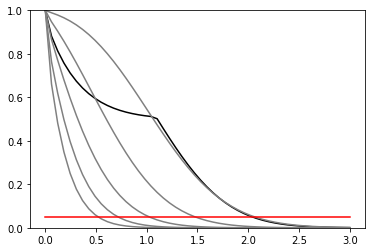

In [371]:
obs = [r[-2:][0] for r in results]
exp = [r[-2:][1][i] for r in results] for i in range(5)]

def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(testmus,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(testmus,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)
    
plot_results(mutests,obs,exp)